In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

In [21]:
with open("mnist_data/X.npy","rb") as f:
    x_train = np.load(f)
    
with open("mnist_data/y.npy","rb") as f:
    y_train = np.load(f)

In [22]:
random.randint(0,100)

5

8

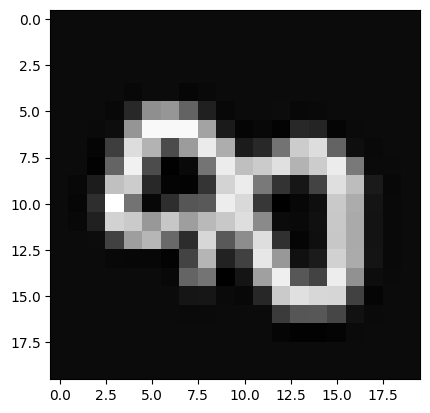

In [23]:
image_no = random.randint(0,x_train.shape[0])
plt.imshow(x_train[image_no].reshape(20,20),cmap="gray")
y_train[image_no].item()

In [24]:
x_train = torch.from_numpy(x_train)
y_train = torch.tensor(y_train,dtype=torch.long)

In [27]:
class DigitNet(nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.l1 = nn.Linear(in_features,25)
        self.l2 = nn.Linear(25,15)
        self.l3 = nn.Linear(15,10)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.l3(x)
        return x

In [45]:
def train(x,y,epochs,lr,model):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr)
    p_bar = tqdm(total=epochs, desc="Training", unit="epoch")
    for _ in range(epochs):
        optimizer.zero_grad()
        loss = loss_fn(model(x),y.reshape(y.shape[0],))
        loss.backward()
        optimizer.step()
        p_bar.set_postfix({"Loss": loss.item()})
        p_bar.update(1)
    p_bar.close()


In [46]:
def predict(x,y,model):
    i = random.randint(0,x.shape[0])
    _,index = torch.max(model(x_train[i].reshape(1,400)),dim=1)
    plt.title(f"Image no:{i} Label:{y_train[i].item()}  Prediction:{index.item()}")
    plt.imshow(x_train[i].reshape(20,20),cmap="gray")

In [30]:
model = DigitNet(x_train.shape[1]).double()

In [31]:
model

DigitNet(
  (l1): Linear(in_features=400, out_features=25, bias=True)
  (l2): Linear(in_features=25, out_features=15, bias=True)
  (l3): Linear(in_features=15, out_features=10, bias=True)
  (relu): ReLU()
)

In [32]:
train(x_train,y_train,1500,0.01,model)

Training: 100%|██████████| 1500/1500 [00:09<00:00, 166.05epoch/s, Loss=6.71e-5] 


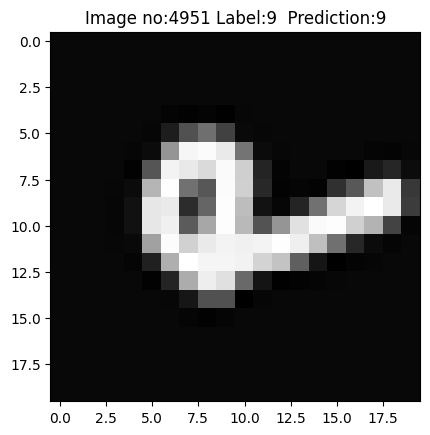

In [44]:
predict(x_train,y_train,model)